In [1]:
import pandas as pd
import numpy as np
import scipy.io as io
import os
import matplotlib.pyplot as plt
from scipy import stats


In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [2]:
global_data = pd.read_csv("Data/global_data.csv")
local_data = pd.read_csv("Data/stockholm_data.csv")

In [3]:
global_data = global_data.dropna()
local_data = local_data.dropna()

Text(0, 0.5, 'Temperature [C°]')

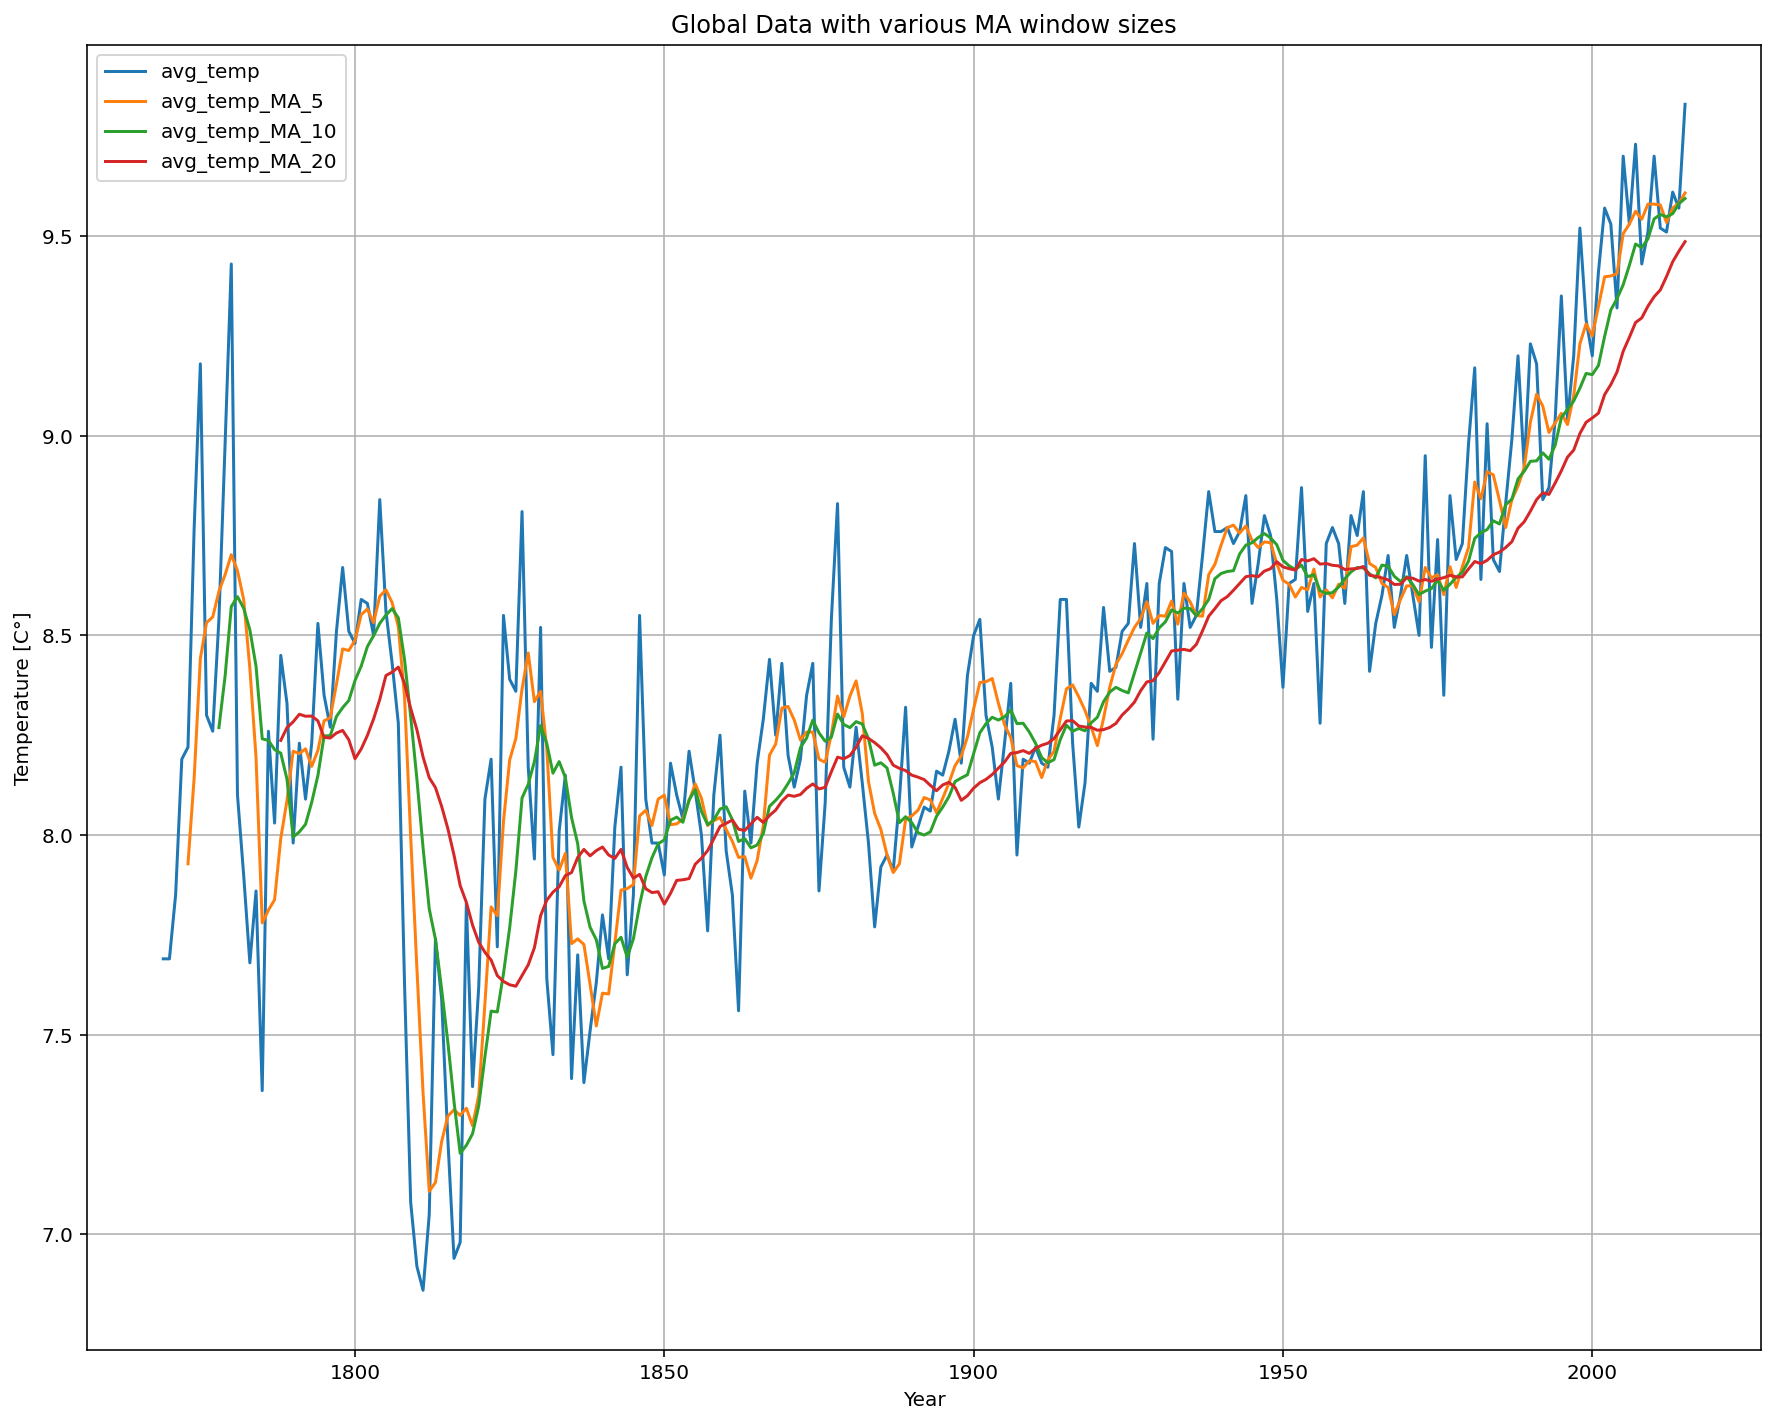

In [15]:
global_data["avg_temp_MA_5"] = global_data["avg_temp"].rolling(window =5).mean()
global_data["avg_temp_MA_10"] = global_data["avg_temp"].rolling(window =10).mean()
# global_data["avg_temp_MA_15"] = global_data["avg_temp"].rolling(window =15).mean()
global_data["avg_temp_MA_20"] = global_data["avg_temp"].rolling(window =20).mean()
global_data.plot(figsize = [15,12], grid = True, title = "Global Data with various MA window sizes", legend = True, x = "year")
plt.xlabel("Year")
plt.ylabel("Temperature [C°]")


Text(0, 0.5, 'Temperature [C°]')

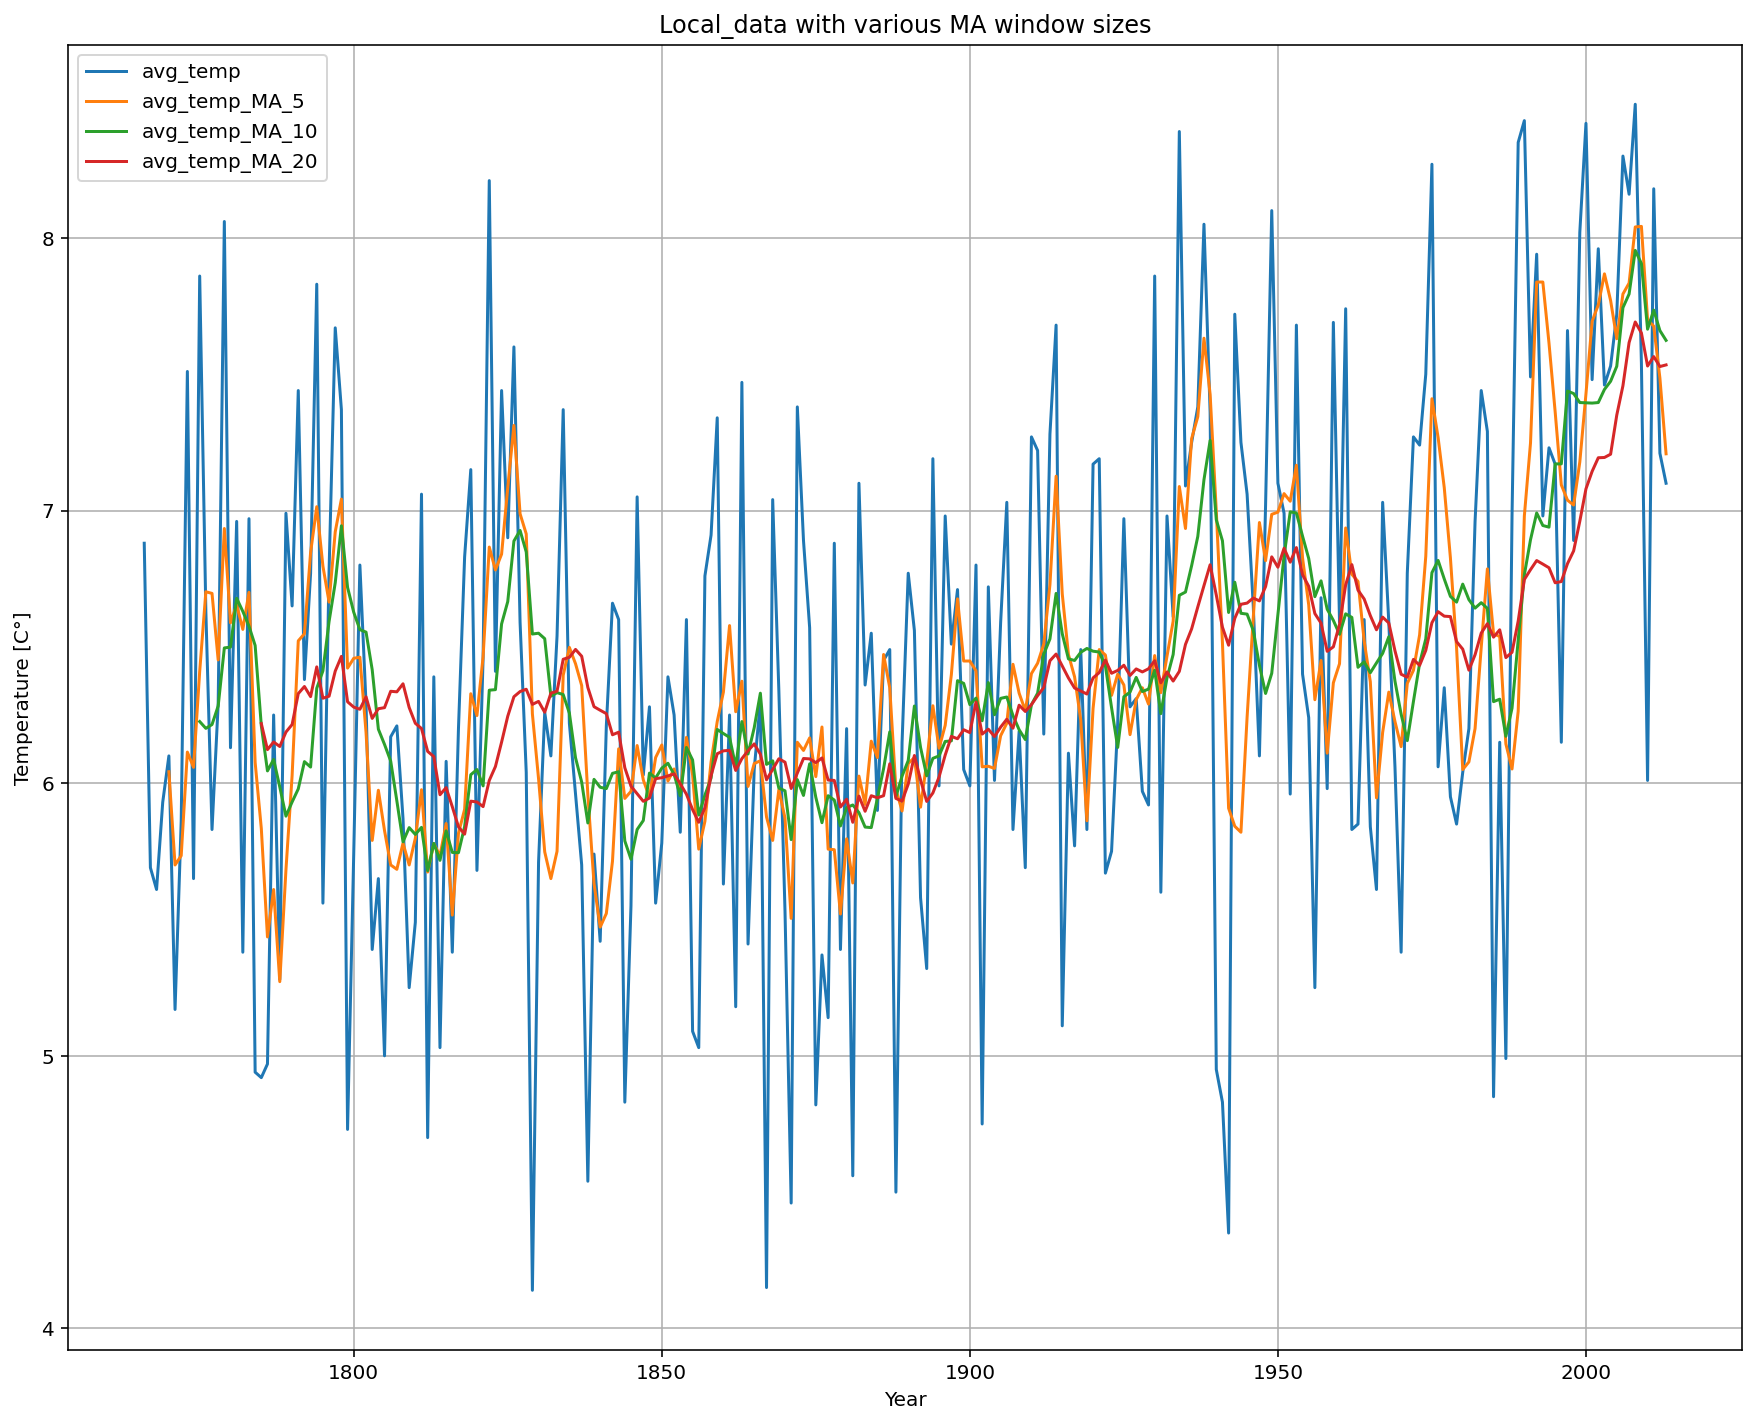

In [14]:
local_data["avg_temp_MA_5"] = local_data["avg_temp"].rolling(window = 5).mean()
local_data["avg_temp_MA_10"] = local_data["avg_temp"].rolling(window = 10).mean()
# local_data["avg_temp_MA_15"] = local_data["avg_temp"].rolling(window = 15).mean()
local_data["avg_temp_MA_20"] = local_data["avg_temp"].rolling(window = 20).mean()
local_data.plot(figsize = [15,12], grid = True, title = "Local_data with various MA window sizes", legend = True, x = "year")
plt.xlabel("Year")
plt.ylabel("Temperature [C°]")


Text(0, 0.5, 'Temperature [C°]')

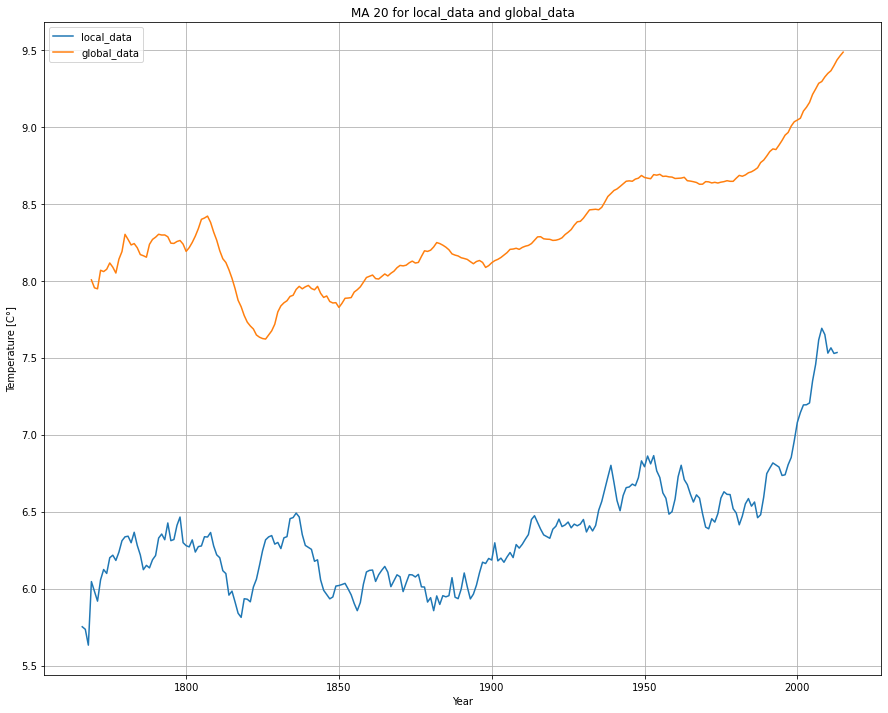

In [6]:
plt.figure(figsize = [15,12])
plt.grid()
plt.plot(local_data["year"], local_data["avg_temp_MA_20"])
plt.plot(global_data["year"], global_data["avg_temp_MA_20"])
plt.title("MA 20 for local_data and global_data")
plt.legend(["local_data", "global_data"])
plt.xlabel("Year")
plt.ylabel("Temperature [C°]")


In [7]:
global_data = global_data.dropna()
local_data = local_data.dropna()

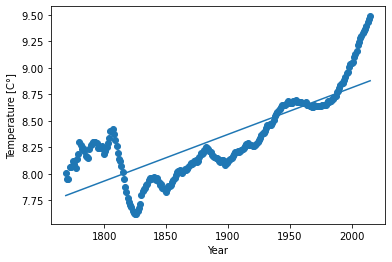

In [8]:
x1 = global_data["year"]
y1 = global_data["avg_temp_MA_20"]

slope1, intercept1, r1, p1, std_err1 = stats.linregress(x1, y1)
def myfunc(x):
  return slope1 * x + intercept1

local_data_model1 = list(map(myfunc, x1))

plt.scatter(x1, y1)
plt.plot(x1, local_data_model1)
plt.xlabel("Year")
plt.ylabel("Temperature [C°]")
plt.show()

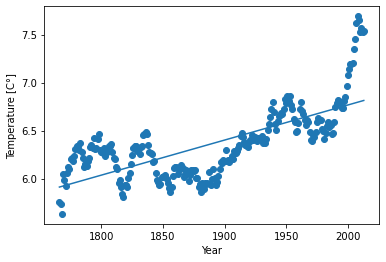

In [9]:
x2 = local_data["year"]
y2 = local_data["avg_temp_MA_20"]
slope2, intercept2, r2, p2, std_err2 = stats.linregress(x2, y2)
def myfunc(x):
  return slope2 * x + intercept2

local_data_model2 = list(map(myfunc, x2))

plt.scatter(x2, y2)
plt.plot(x2, local_data_model2)
plt.xlabel("Year")
plt.ylabel("Temperature [C°]")
plt.show()

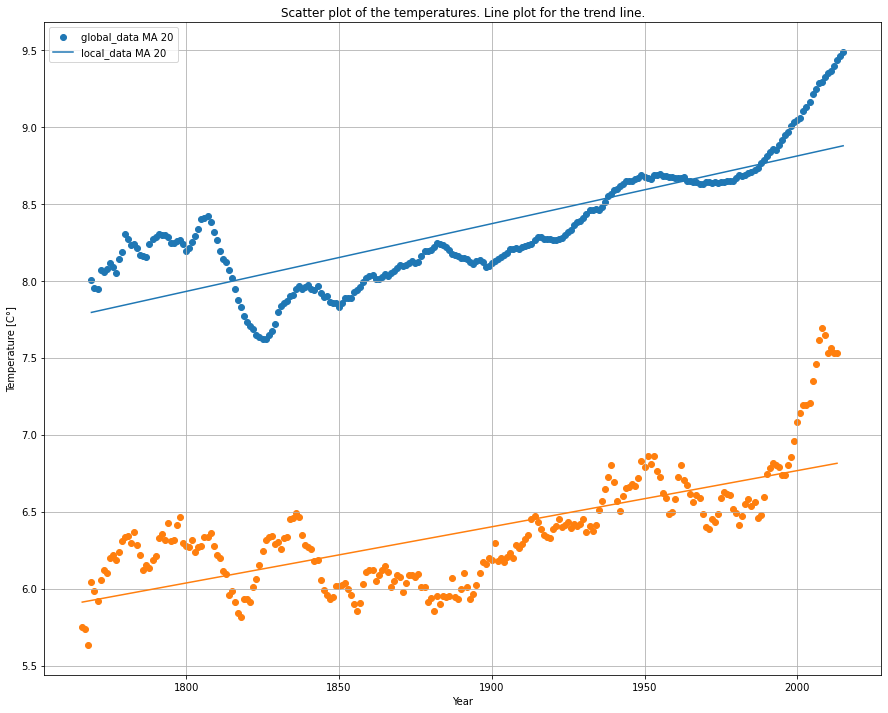

global_data has a slope coefficient of 0.004401443999910808
local has a slope coefficient of 0.003651817338571997


In [10]:
plt.figure(figsize = [15,12])
plt.grid()
plt.scatter(x1, y1)
plt.plot(x1, local_data_model1)
plt.scatter(x2, y2)
plt.plot(x2, local_data_model2)
plt.title("Scatter plot of the temperatures. Line plot for the trend line.")
plt.legend(["global_data MA 20", "local_data MA 20"])
plt.xlabel("Year")
plt.ylabel("Temperature [C°]")
plt.show()


print("global_data has a slope coefficient of " + str(slope1))
print("local has a slope coefficient of " + str(slope2))

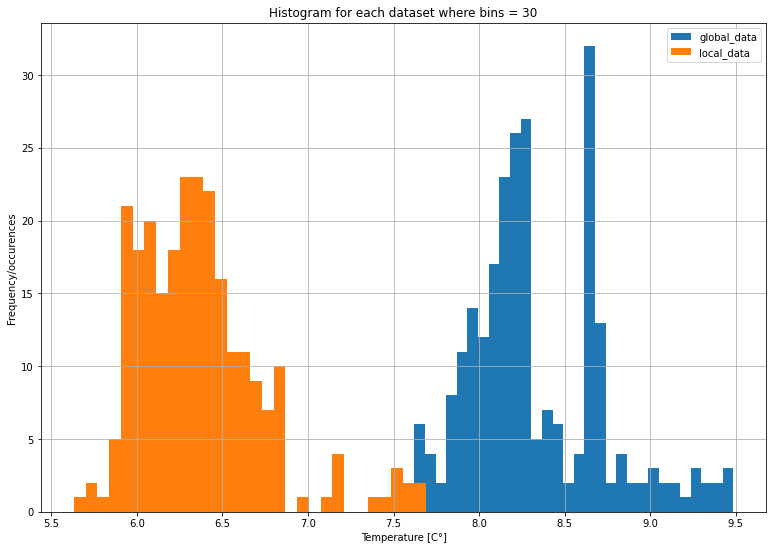

In [11]:
plt.figure(figsize = [13,9])
plt.grid()
plt.hist(y1, bins = 30)
plt.hist(y2, bins = 30)
plt.title("Histogram for each dataset where bins = 30")
plt.xlabel("Temperature [C°]")
plt.ylabel("Frequency/occurences")
plt.legend(["global_data", "local_data"])